# Neural networks with varying number of nodes and layers



In [1]:
import autograd.numpy as np  # We need to use this numpy wrapper to make automatic differentiation work later
from sklearn import datasets
import matplotlib.pyplot as plt
import os
import json
from pprint import pprint

MNIST loaded: 70000 images of shape (28, 28) labels: (70000,)
Saved figure to ../Figures/mnist_examples.png


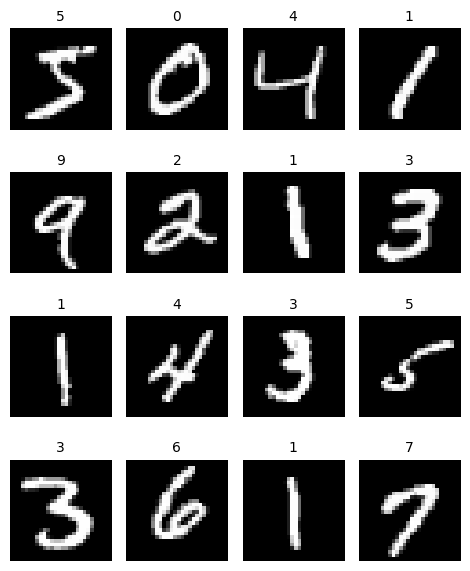

In [2]:
# Load MNIST from OpenML and plot examples
# Specify parser='liac-arff' to avoid requiring pandas for ARFF parsing
mnist = datasets.fetch_openml('mnist_784', version=1, as_frame=False, parser='liac-arff')
X = mnist.data.reshape(-1, 28, 28).astype(np.float32) / 255.0
y = mnist.target.astype(int)

print("MNIST loaded:", X.shape[0], "images of shape", X.shape[1:], "labels:", y.shape)

n_rows, n_cols = 4, 4  # change to plot more/less examples
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.5))
for i in range(n_rows * n_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(X[i], cmap='gray', interpolation='nearest')
    ax.set_title(str(y[i]), fontsize=10)
    ax.axis('off')
plt.tight_layout()
outpath = os.path.join('..', 'Figures', 'mnist_examples.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight', facecolor='white')
print("Saved figure to", outpath)
plt.show()

Fashion-MNIST loaded: 70000 images of shape (28, 28) labels: (70000,)
Saved figure to ../Figures/fashion_mnist_examples.png


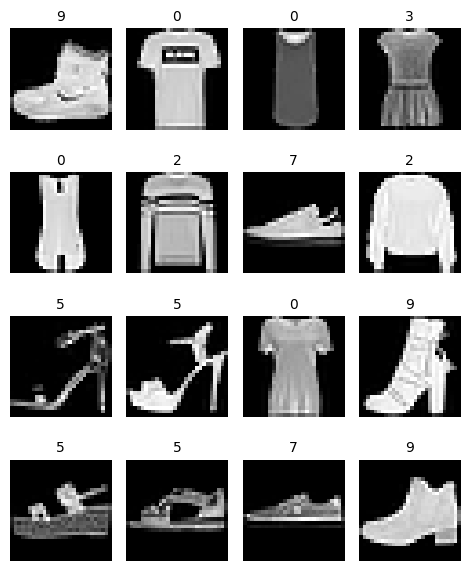

In [3]:
# Load Fashion-MNIST and plot examples 
fm = datasets.fetch_openml('Fashion-MNIST', version=1, as_frame=False, parser='liac-arff')
Xf = fm.data.reshape(-1, 28, 28).astype(np.float32) / 255.0
yf = fm.target.astype(int)

print("Fashion-MNIST loaded:", Xf.shape[0], "images of shape", Xf.shape[1:], "labels:", yf.shape)

# reuse n_rows, n_cols if present, otherwise default to 4x4
try:
    n_rows, n_cols
except NameError:
    n_rows, n_cols = 4, 4

plt.figure(figsize=(n_cols * 1.2, n_rows * 1.5))
for idx in range(n_rows * n_cols):
    ax = plt.subplot(n_rows, n_cols, idx + 1)
    plt.imshow(Xf[idx], cmap='gray', interpolation='nearest')
    ax.set_title(str(yf[idx]), fontsize=10)
    ax.axis('off')
plt.tight_layout()
os.makedirs('../Figures', exist_ok=True)
fig = plt.gcf()
outpath = os.path.join('..', 'Figures', 'fashion_mnist_examples.png')
fig.savefig(outpath, dpi=300, bbox_inches='tight', facecolor='white')
print("Saved figure to", outpath)
plt.show()

Loaded JSON from: data/nn_50_sigmoid_plain_no_metrics.json
MSE: 0.009547462742712893, R2: 0.8836684222010286
Loaded JSON from: data/nn_100_sigmoid_plain_no_metrics.json
MSE: 0.009589568120116574, R2: 0.883153871935872
Loaded JSON from: data/nn_50_50_sigmoid_plain_no_metrics.json
MSE: 0.009383474062601517, R2: 0.8856632311597372
Loaded JSON from: data/nn_100_100_sigmoid_plain_no_metrics.json
MSE: 0.009401130854663993, R2: 0.8854476385034126
Loaded JSON from: data/ols_metrics.json
MSE: 0.010975094308561558, R2: 0.8471780118227936
Saved figure to ../Figures/nn_metrics_comparison.png


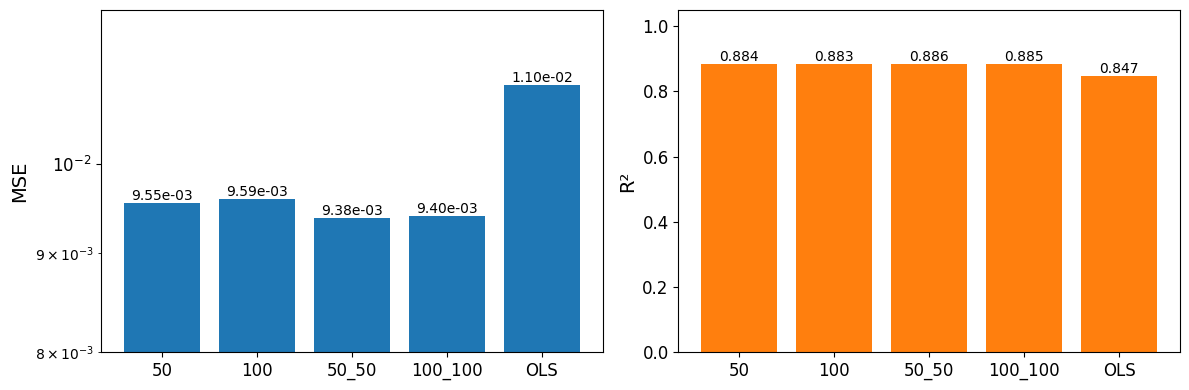

In [9]:
path = os.path.join('data', 'nn_50_sigmoid_plain_no_metrics.json')

with open(path, 'r', encoding='utf-8') as f:
    nn_data = json.load(f)

print("Loaded JSON from:", path)
mse_50_sigmoid_plain_no_metrics = nn_data.get("mse", None)
r2_50_sigmoid_plain_no_metrics = nn_data.get("r2", None)

print(f"MSE: {mse_50_sigmoid_plain_no_metrics}, R2: {r2_50_sigmoid_plain_no_metrics}")

path = os.path.join('data', 'nn_100_sigmoid_plain_no_metrics.json')

with open(path, 'r', encoding='utf-8') as f:
    nn_data = json.load(f)

print("Loaded JSON from:", path)
mse_100_sigmoid_plain_no_metrics = nn_data.get("mse", None)
r2_100_sigmoid_plain_no_metrics = nn_data.get("r2", None)

print(f"MSE: {mse_100_sigmoid_plain_no_metrics}, R2: {r2_100_sigmoid_plain_no_metrics}")

path = os.path.join('data', 'nn_50_50_sigmoid_plain_no_metrics.json')

with open(path, 'r', encoding='utf-8') as f:
    nn_data = json.load(f)

print("Loaded JSON from:", path)
mse_50_50_sigmoid_plain_no_metrics = nn_data.get("mse", None)
r2_50_50_sigmoid_plain_no_metrics = nn_data.get("r2", None)

print(f"MSE: {mse_50_50_sigmoid_plain_no_metrics}, R2: {r2_50_50_sigmoid_plain_no_metrics}")

path = os.path.join('data', 'nn_100_100_sigmoid_plain_no_metrics.json')

with open(path, 'r', encoding='utf-8') as f:
    nn_data = json.load(f)

print("Loaded JSON from:", path)
mse_100_100_sigmoid_plain_no_metrics = nn_data.get("mse", None)
r2_100_100_sigmoid_plain_no_metrics = nn_data.get("r2", None)

print(f"MSE: {mse_100_100_sigmoid_plain_no_metrics}, R2: {r2_100_100_sigmoid_plain_no_metrics}")

path = os.path.join('data', 'ols_metrics.json')

with open(path, 'r', encoding='utf-8') as f:
    ols_data = json.load(f)

print("Loaded JSON from:", path)
mse_ols = ols_data.get("mse", None)
r2_ols = ols_data.get("r2", None)

print(f"MSE: {mse_ols}, R2: {r2_ols}")

labels = ['50', '100', '50_50', '100_100', 'OLS']
mse_vals = [mse_50_sigmoid_plain_no_metrics, mse_100_sigmoid_plain_no_metrics,
            mse_50_50_sigmoid_plain_no_metrics, mse_100_100_sigmoid_plain_no_metrics,
            mse_ols]
r2_vals = [r2_50_sigmoid_plain_no_metrics, r2_100_sigmoid_plain_no_metrics,
           r2_50_50_sigmoid_plain_no_metrics, r2_100_100_sigmoid_plain_no_metrics,
           r2_ols]

# Replace None with nan for plotting
mse_vals = [v if v is not None else np.nan for v in mse_vals]
r2_vals = [v if v is not None else np.nan for v in r2_vals]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# MSE (log scale to make small differences visible)
ax = axes[0]
bars = ax.bar(labels, mse_vals, color='C0')
ax.set_ylabel('MSE', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
for lbl in ax.get_xticklabels():
    lbl.set_fontsize(12)
ax.set_yscale('log')
ax.set_ylim(8e-3, 1.2e-2)
for bar, val in zip(bars, mse_vals):
    if not np.isnan(val):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{val:.2e}',
                ha='center', va='bottom', fontsize=10)

# R2
ax = axes[1]
bars = ax.bar(labels, r2_vals, color='C1')
ax.set_ylabel('R²', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
for lbl in ax.get_xticklabels():
    lbl.set_fontsize(12)
ax.set_ylim(0, 1.05)
for bar, val in zip(bars, r2_vals):
    if not np.isnan(val):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{val:.3f}',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
os.makedirs('../Figures', exist_ok=True)
outpath = os.path.join('..', 'Figures', 'nn_metrics_comparison.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight', facecolor='white')
print("Saved figure to", outpath)
plt.show()

Saved figure to ../Figures/nn_metrics_comparison_vertical.png


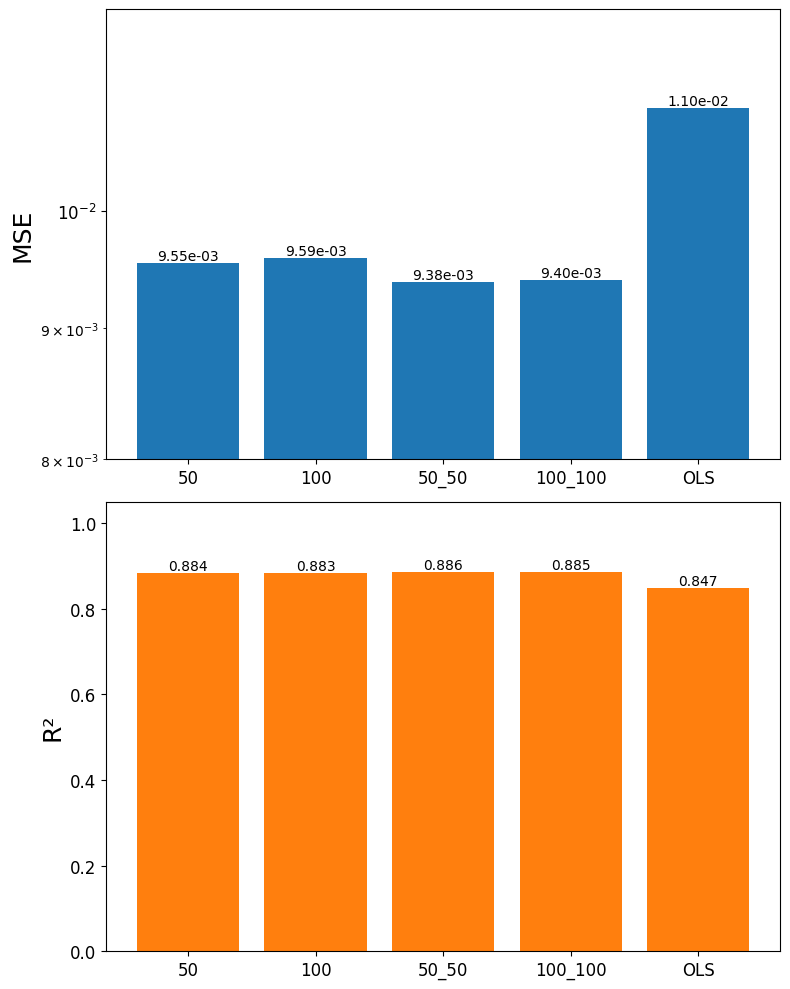

In [11]:
# create a vertical layout: MSE on top, R² below
fig_v, axes_v = plt.subplots(2, 1, figsize=(8, 10))

# Top: MSE (log scale)
ax_mse = axes_v[0]
bars_mse = ax_mse.bar(labels, mse_vals, color='C0')
ax_mse.set_ylabel('MSE', fontsize=18)
ax_mse.tick_params(axis='both', which='major', labelsize=12)
ax_mse.set_yscale('log')
ax_mse.set_ylim(8e-3, 1.2e-2)
for bar, val in zip(bars_mse, mse_vals):
    if not np.isnan(val):
        ax_mse.text(bar.get_x() + bar.get_width() / 2,
                    val,
                    f'{val:.2e}',
                    ha='center', va='bottom', fontsize=10)

# Bottom: R2
ax_r2 = axes_v[1]
bars_r2 = ax_r2.bar(labels, r2_vals, color='C1')
ax_r2.set_ylabel('R²', fontsize=18)
ax_r2.tick_params(axis='both', which='major', labelsize=12)
ax_r2.set_ylim(0, 1.05)
for bar, val in zip(bars_r2, r2_vals):
    if not np.isnan(val):
        ax_r2.text(bar.get_x() + bar.get_width() / 2,
                   val,
                   f'{val:.3f}',
                   ha='center', va='bottom', fontsize=10)

plt.tight_layout()
os.makedirs('../Figures', exist_ok=True)
outpath_v = os.path.join('..', 'Figures', 'nn_metrics_comparison_vertical.png')
fig_v.savefig(outpath_v, dpi=300, bbox_inches='tight', facecolor='white')
print("Saved figure to", outpath_v)
plt.show()

Saved figure to ../Figures/predictions_comparison.png


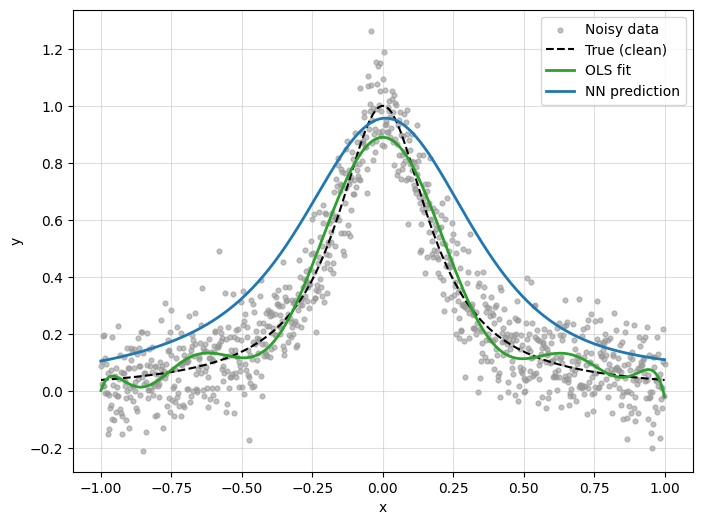

In [18]:
with open("data/xy.json", "r") as f:
    data = json.load(f)

# reconstruct arrays with same shape as originally saved
x_noisy = np.array(data["x"]).reshape(-1, 1)
y_noisy = np.array(data["y"]).reshape(-1, 1)

with open("data/xx_yy_yols.json", "r") as f:
    data = json.load(f)

# reconstruct arrays with same shape as originally saved
xx = np.array(data["xx"]).reshape(-1, 1)
yy = np.array(data["yy"]).reshape(-1, 1)
y_ols = np.array(data["y_ols"]).reshape(-1, 1)

with open("data/x_plot_predictions_50_sigmoid_plain_no_metrics.json", "r") as f:
    plot_data = json.load(f)

x_plot_s = np.array(plot_data["x_plot"]).reshape(-1, 1)
y_pred_plot = np.array(plot_data["y_pred_plot"]).reshape(-1, 1)

# plot noisy data, true signal, OLS and NN predictions
fig, axp = plt.subplots(figsize=(8, 6))
axp.scatter(x_noisy.ravel(), y_noisy.ravel(), s=12, color='0.6', alpha=0.6, label='Noisy data')
axp.plot(xx.ravel(), yy.ravel(), 'k--', lw=1.5, label='True (clean)')
axp.plot(xx.ravel(), y_ols.ravel(), color='C2', lw=2, label='OLS fit')

# ensure NN prediction line is plotted in x order
xp = x_plot_s.ravel()
yp = y_pred_plot.ravel()
order = np.argsort(xp)
axp.plot(xp[order], yp[order], color='C0', lw=2, label='NN prediction')

axp.set_xlabel('x')
axp.set_ylabel('y')
axp.legend()
axp.grid(alpha=0.4)

os.makedirs('../Figures', exist_ok=True)
outpath = os.path.join('..', 'Figures', 'predictions_comparison.png')
fig.savefig(outpath, dpi=300, bbox_inches='tight', facecolor='white')
print("Saved figure to", outpath)
plt.show()